## A nice way to represent integers: Recursive Prime Decompositon

Kyle Cranmer, March 2016

Recently I saw a geeky discussion about the pros and cons of different ways of representing numbers. It reminded me of a way to represent numbers I came up with around 1999. I'm guessing someone else has thought of this, but I've never found a reference to it despite asking a few math professors about it. Anyways, I thought I'd describe it breifly and make some code to demonstrate it.

The most common numbering systems we know use [positional notation](https://en.wikipedia.org/wiki/Positional_notation). This includes our every-day base-10 numbers, binary, and [hexadecimal](https://en.wikipedia.org/wiki/Hexadecimal). Those systems are nice and methodical, and the length of the representation grows logrithmicaly with the size of the number, which is nice. I won't talk about ugly representations of numbers like  Roman Numerals. Of the positional systems, binary is the most minimal because it only relies on two symbols 0 and 1. 

While it's kind of silly, I also like to think about the base-1 system, which results in simply putting as many markers $\cdot$ as the number. For instance, 3 would be denoted $\cdot\cdot\cdot$. It's really minimal, you only need one symbol, but the lenth of the representation of the number grows linearly with the number.

Now there is a totally different way of representing integers that is elegant from the point of view of a pure mathematician or number theorist. It's called the [*Canonical representation of a positive integer*](https://en.wikipedia.org/wiki/Fundamental_theorem_of_arithmetic#Canonical_representation_of_a_positive_integer). Fancy name, here's the idea: Every positive integer $n > 1$ can be represented in exactly one way as a product of prime powers:

\begin{equation}
n
= p_1^{\alpha_1}p_2^{\alpha_2} \cdots p_k^{\alpha_k}
= \prod_{i=1}^{k}p_i^{\alpha_i}
\end{equation}

where $p_1 < p_2 < \dots < p_k$ are primes and the $\alpha_i$ are positive integers.
 There's no need to explicitly list the primes because they are so fundamental, and they mean something totally independent of how we choose to write the numbers down. So we could just keep track of the powers $(\alpha_1, \alpha_2, \dots, \alpha_k)$. For example, 1200 = 24 × 31 × 52 = 3 × 2 × 2 × 2 × 2 × 5 × 5 = $2^4 3^1 5^2$, and in this representation we can  just write $(4,1,2)$.
 
The length of canonical representation has a complicated behavior with $n$. Sometimes you have a very compact representation. The representation is longest for prime numbers, and  shortest for powers of 2. This is clearly related to the [Mersenne Primes](https://en.wikipedia.org/wiki/Mersenne_prime) that have the form $2^n-1$. 

I like the canonical representation or prime number decomposition because it is so closely related to number theory. The problem though is that when we wrote $(4,1,2)$ we had to decide how to write down 4, 1, and 2 -- isn't the point of this that we are trying to find a nice way to represent numbers? Why am I using base-10 to encode the powers $\alpha_i$? 

### Recursion to the rescue!

What if I just recursively apply the prime number decomposition to the powers $\alpha_i$? Eventually I will get to the point that the $\alpha_i$ are 0's or 1's.
In our example 1200 = $2^4 3^1 5^2 = (4,1,2)$. I would just do the same for 4, 1, and 2. 
Let's start with 4, I know $4=2^2=(2)$, now I recurse once more and I get to $2=(1)$. Put it back together and I have $4=((1))$. So I can write 1200 = (4,1,2) = (((1)),1,(1)). 

Perfect, now I have a way of writing down the integers that has the best properties:
  * minimal number of symbols (like binary)
  * nice relationship to number theory (like the canonical representation)

  
So let's code it up and check it out

## Generate list of primes

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def primesfrom2to(n):
    # http://stackoverflow.com/questions/2068372/fastest-way-to-list-all-primes-below-n-in-python/3035188#3035188
    """ Input n>=6, Returns a array of primes, 2 <= p < n """
    sieve = np.ones(n/3 + (n%6==2), dtype=np.bool)
    sieve[0] = False
    for i in range(int(int(n**0.5)/3+1)):
        if sieve[i]:
            k=3*i+1|1
            sieve[int(      ((k*k)/3))      ::2*k] = False
            sieve[int((k*k+4*k-2*k*(i&1))/3)::2*k] = False
    return np.r_[2,3,((3*np.nonzero(sieve)[0]+1)|1)]

In [3]:
primesfrom2to(100)

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

## Prime decomposition / Canonical representation

In [4]:
def prime_decomp(n):
    primes = primesfrom2to(n+1)
    decomp = []
    for p in primes:
        this_factor = 0
        while n%p == 0:
            n=n/p
            this_factor+=1
        decomp.append(this_factor)
    largest_prime = 0
    for i, power in enumerate(decomp):
        if power>0:
            largest_prime = i
    return decomp[:largest_prime+1]

In [5]:
def recompose(decomp):
    #make the needed primes
    primes = []
    temp=2
    while len(primes)<len(decomp):
        temp*=2
        primes = primesfrom2to(temp+1)
    #print(primes)
    # recompose the number
    n=1
    for prime, power in zip(primes, decomp):
        n*= prime**power
    return n

In [6]:
prime_decomp(1200)

[4, 1, 2]

In [7]:
recompose(prime_decomp(1200))

1200

In [8]:
for i in range(1,65):
    print(prime_decomp(i))

[0]
[1]
[0, 1]
[2]
[0, 0, 1]
[1, 1]
[0, 0, 0, 1]
[3]
[0, 2]
[1, 0, 1]
[0, 0, 0, 0, 1]
[2, 1]
[0, 0, 0, 0, 0, 1]
[1, 0, 0, 1]
[0, 1, 1]
[4]
[0, 0, 0, 0, 0, 0, 1]
[1, 2]
[0, 0, 0, 0, 0, 0, 0, 1]
[2, 0, 1]
[0, 1, 0, 1]
[1, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
[3, 1]
[0, 0, 2]
[1, 0, 0, 0, 0, 1]
[0, 3]
[2, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[5]
[0, 1, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 1]
[0, 0, 1, 1]
[2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 1]
[0, 1, 0, 0, 0, 1]
[3, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 1, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[2, 0, 0, 0, 1]
[0, 2, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[4, 1]
[0, 0, 0, 2]
[1, 0, 2]
[0, 1, 0, 0, 0, 0, 1]
[2, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[1, 3]
[0, 0, 1, 0, 1]
[3, 0, 0, 1]
[0, 1, 0, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Recursive prime decomposition

In [9]:
def recursive_prime_decomp(n):
    if n==0:
        return 0
    if n==1:
        return 1
    else:
        primes = primesfrom2to(n+1)
        decomp = []
        for p in primes:
            this_factor = 0
            while n%p == 0:
                n=n/p
                this_factor+=1
            decomp.append(this_factor)
        largest_prime = 0
        for i, power in enumerate(decomp):
            if power>0:
                largest_prime = i
        decomp = decomp[:largest_prime+1]
        new_decomp = []
        for power in decomp:
            new_decomp.append(recursive_prime_decomp(power))
        return new_decomp

In [10]:
recursive_prime_decomp(1200)

[[[1]], 1, [1]]

In [11]:
for i in range(65):
    print(i, recursive_prime_decomp(i))

0 0
1 1
2 [1]
3 [0, 1]
4 [[1]]
5 [0, 0, 1]
6 [1, 1]
7 [0, 0, 0, 1]
8 [[0, 1]]
9 [0, [1]]
10 [1, 0, 1]
11 [0, 0, 0, 0, 1]
12 [[1], 1]
13 [0, 0, 0, 0, 0, 1]
14 [1, 0, 0, 1]
15 [0, 1, 1]
16 [[[1]]]
17 [0, 0, 0, 0, 0, 0, 1]
18 [1, [1]]
19 [0, 0, 0, 0, 0, 0, 0, 1]
20 [[1], 0, 1]
21 [0, 1, 0, 1]
22 [1, 0, 0, 0, 1]
23 [0, 0, 0, 0, 0, 0, 0, 0, 1]
24 [[0, 1], 1]
25 [0, 0, [1]]
26 [1, 0, 0, 0, 0, 1]
27 [0, [0, 1]]
28 [[1], 0, 0, 1]
29 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
30 [1, 1, 1]
31 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
32 [[0, 0, 1]]
33 [0, 1, 0, 0, 1]
34 [1, 0, 0, 0, 0, 0, 1]
35 [0, 0, 1, 1]
36 [[1], [1]]
37 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
38 [1, 0, 0, 0, 0, 0, 0, 1]
39 [0, 1, 0, 0, 0, 1]
40 [[0, 1], 0, 1]
41 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
42 [1, 1, 0, 1]
43 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
44 [[1], 0, 0, 0, 1]
45 [0, [1], 1]
46 [1, 0, 0, 0, 0, 0, 0, 0, 1]
47 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
48 [[[1]], 1]
49 [0, 0, 0, [1]]
50 [1, 0, [1]]
51 [0, 1, 0, 0, 0, 0, 1]


## Link to hyperoperations and Knuth's up-arrow notation

The recursive prime decomposition has some nice connections to 
[Knuth's up-arrow notation](https://en.wikipedia.org/wiki/Knuth%27s_up-arrow_notation)


To extend the sequence of operations (addition, multiplication, exponentiation), Knuth defined a “double arrow” operator to denote iterated exponentiation (tetration):

  \begin{matrix}
   a\uparrow\uparrow b & = {\ ^{b}a}  = & \underbrace{a^{a^{{}^{.\,^{.\,^{.\,^a}}}}}} & 
   = & \underbrace{a\uparrow (a\uparrow(\dots\uparrow a))} 
\\  
    & & b\mbox{ copies of }a
    & & b\mbox{ copies of }a
  \end{matrix}
 
Let's check out $2\uparrow\uparrow n$ for the $n=0,1,2,3,4$

In [12]:
recursive_prime_decomp(2)

[1]

In [13]:
recursive_prime_decomp(2**2)

[[1]]

In [14]:
recursive_prime_decomp(2**2)

[[1]]

In [15]:
recursive_prime_decomp(2**2**2)

[[[1]]]

In [16]:
recursive_prime_decomp(2**2**2**2)

[[[[1]]]]

In [17]:
recursive_prime_decomp(3**3)

[0, [0, 1]]

In [18]:
#recursive_prime_decomp(3**3**3) #too big, you get the idea

### pentation

I haven't worked it out, but it seems like the "multiplication tables" in this notation may be natural for "hyper-operations". For instance, after the "tetration" of $a\uparrow\uparrow b$ there is $a\uparrow\uparrow\uparrow b$ (also written or $a\uparrow^3 b$) ["pentation"](https://en.wikipedia.org/wiki/Pentation). The only reasonably sized example is $2\uparrow^3 2 = 65536$. But we already did that one because $2\uparrow^3 2 = 2^{2^{2^2}} = 2\uparrow^2 4 = 65536$.

(Side note: This idea of recursively defining the hyperoperations is related to [Ackermann's Function](https://en.wikipedia.org/wiki/Ackermann_function), which I learned about while taking a graduate computability class in Madison, WI back in the day. )

looks tempting. I wish I could do $2\uparrow^3 4$, but it is a *huge* number. The only other practical example is:
$3\uparrow^3 2 = 3^{3^3} = 7625597484987$

In [19]:
#recursive_prime_decomp(7625597484987) # too big for this simple code

## some other fun examples

In [20]:
recursive_prime_decomp(2*3*5*7*11)

[1, 1, 1, 1, 1]

In [21]:
recursive_prime_decomp((2**2)*(3**2)*(5**2)*(7**2)*(11**2))

[[1], [1], [1], [1], [1]]

In [22]:
recursive_prime_decomp((2**3)*(3**3)*(5**3)*(7**3))

[[0, 1], [0, 1], [0, 1], [0, 1]]

In [23]:
recursive_prime_decomp((2**2)*(3**3)*(5**5))

[[1], [0, 1], [0, 0, 1]]

## Some plots of recursion depth and length of representation

In [24]:
from collections import Sequence
from itertools import chain, count

def depth(seq):
    #http://stackoverflow.com/questions/6039103/counting-deepness-or-the-deepest-level-a-nested-list-goes-to
    seq = iter(seq)
    try:
        for level in count():
            seq = chain([next(seq)], seq)
            seq = chain.from_iterable(s for s in seq if isinstance(s, Sequence))
    except StopIteration:
        return level

def flatten(container):
    #http://stackoverflow.com/questions/10823877/what-is-the-fastest-way-to-flatten-arbitrarily-nested-lists-in-python
    for i in container:
        if isinstance(i, list) or isinstance(i, tuple):
            for j in flatten(i):
                yield j
        else:
            yield i

def total_len(decomp):
    return len(list(flatten(decomp)))

In [25]:
print("the number %d has depth %d" %(2**2**2**2, depth(recursive_prime_decomp(2**2**2**2))))

the number 65536 has depth 4


In [26]:
funny_number = (2**3)*(3**3)*(5**3)*(7**3)
print(funny_number, " has representation ", recursive_prime_decomp(funny_number), \
      " and total length ", total_len(recursive_prime_decomp(funny_number)))

9261000  has representation  [[0, 1], [0, 1], [0, 1], [0, 1]]  and total length  8


In [27]:
n_max=2**2**2**2+1
depth_n, total_n = np.zeros(n_max), np.zeros(n_max)

for n in range(2,n_max):
    decomp = recursive_prime_decomp(n)
    depth_n[n] = depth(decomp)
    total_n[n] = total_len(decomp)

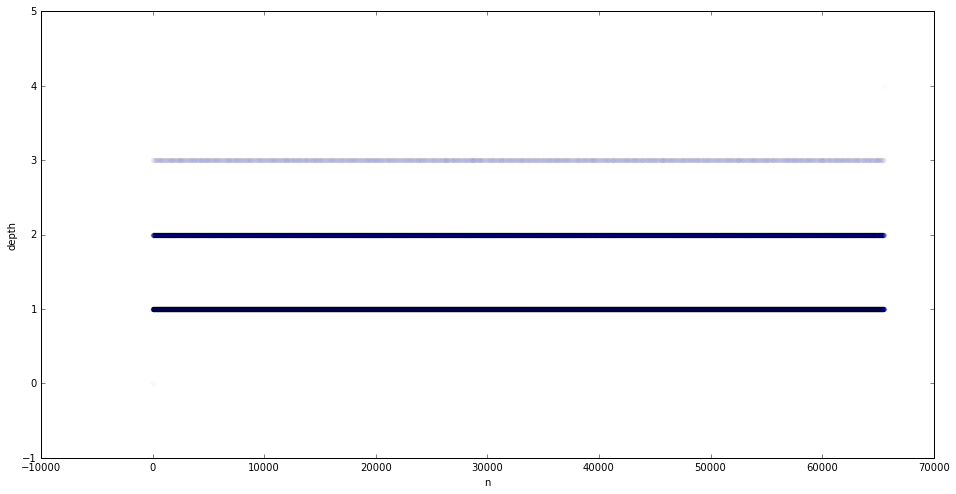

In [28]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(n_max),depth_n, alpha=0.01)
plt.xlabel('n')
plt.ylabel('depth')

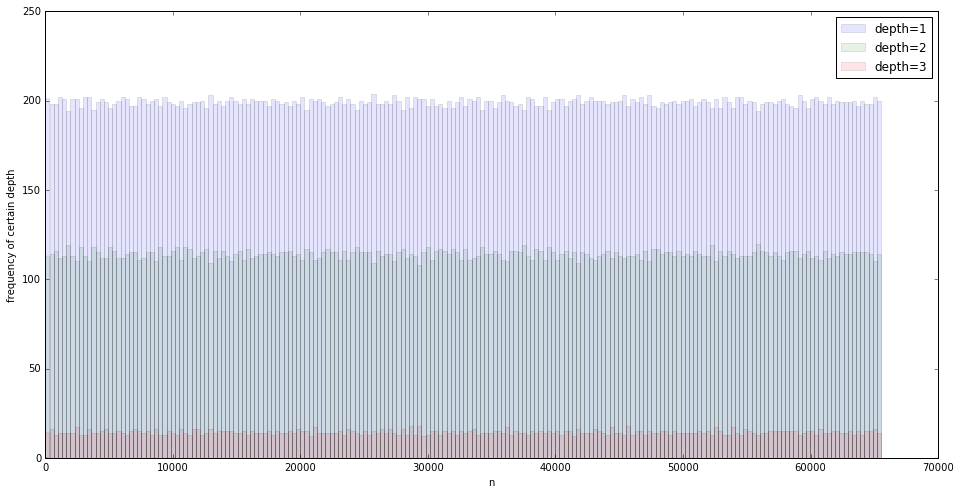

In [29]:
plt.figure(figsize=(16, 8))
h = plt.hist(np.arange(n_max)[depth_n==1], bins=200,alpha=0.1, label='depth=1')
h = plt.hist(np.arange(n_max)[depth_n==2], bins=h[1], alpha=0.1, label='depth=2')
h = plt.hist(np.arange(n_max)[depth_n==3], bins=h[1], alpha=0.1, label='depth=3')
plt.legend()
plt.xlabel('n')
plt.ylabel('frequency of certain depth')

//anaconda/envs/carl-notebooks-2/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


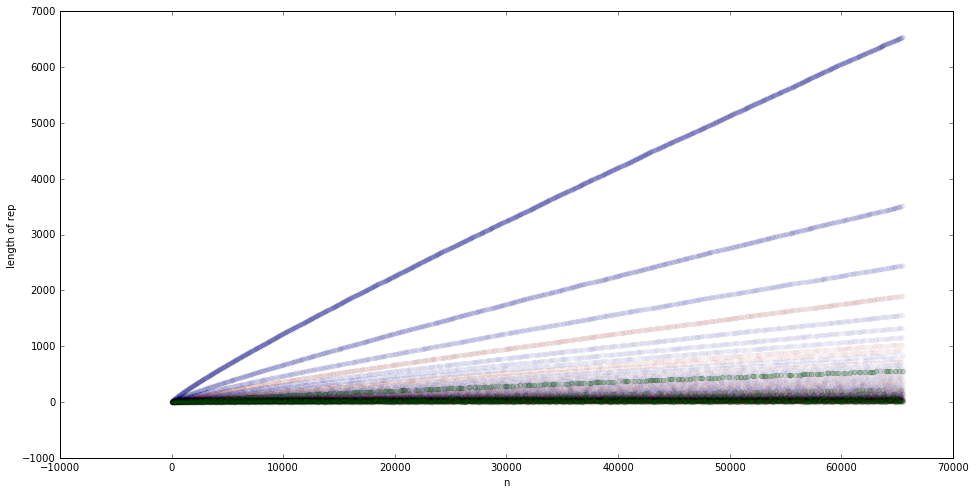

In [31]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(n_max)[depth_n==1],total_n[depth_n==1], alpha=0.01,c='b')
plt.scatter(np.arange(n_max)[depth_n==2],total_n[depth_n==2], alpha=0.01, c='r')
plt.scatter(np.arange(n_max)[depth_n==3],total_n[depth_n==3], alpha=0.1, c='g')
plt.xlabel('n')
plt.ylabel('length of rep')
plt.legend(loc='upper left')

//anaconda/envs/carl-notebooks-2/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
//anaconda/envs/carl-notebooks-2/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
//anaconda/envs/carl-notebooks-2/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide
//anaconda/envs/carl-notebooks-2/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


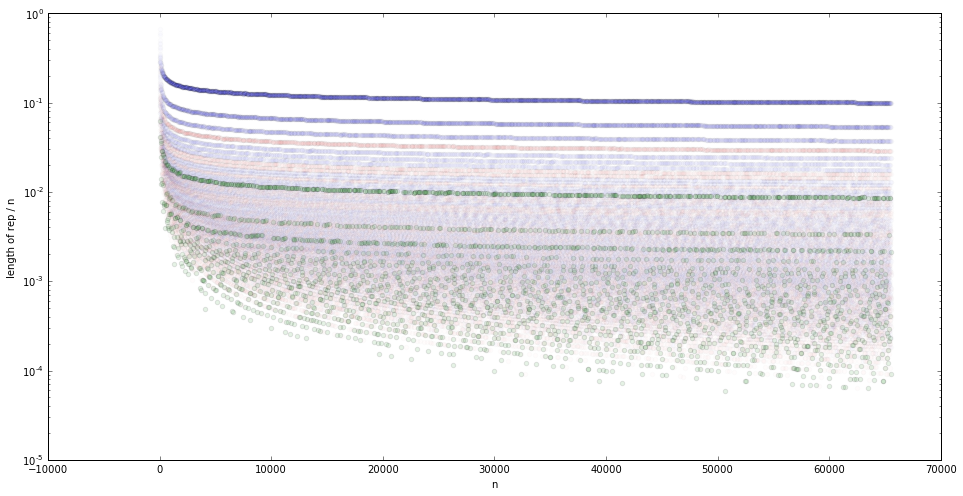

In [32]:
plt.figure(figsize=(16, 8))
plt.scatter(np.arange(n_max)[depth_n==1],1.*(total_n/np.arange(n_max))[depth_n==1], alpha=0.01,c='b')
plt.scatter(np.arange(n_max)[depth_n==2],1.*(total_n/np.arange(n_max))[depth_n==2], alpha=0.01, c='r')
plt.scatter(np.arange(n_max)[depth_n==3],1.*(total_n/np.arange(n_max))[depth_n==3], alpha=0.1, c='g')
plt.semilogy()
plt.ylim(1e-5,1)
plt.xlabel('n')
plt.ylabel('length of rep / n')
plt.legend(loc='lower left')